# 🧠 Project: Heart Disease Prediction using Machine Learning

Heart disease is one of the leading causes of death globally. Early detection is critical in improving patient outcomes. This project uses machine learning techniques to predict the presence of heart disease using patient data like age, cholesterol, chest pain type, and other medical indicators.

**Key Highlights:**
- Used Logistic Regression as the base classification model
- Performed data cleaning, outlier detection (IQR method), and EDA
- Achieved ~85% accuracy with good precision and recall
- Presented results using visual plots and user-friendly prediction labels
- Made the model understandable for both technical and non-technical audiences

This model can be further enhanced using ensemble algorithms and deployed as a web application for healthcare use cases.


### Importing Required Libraries
We begin by importing the essential Python libraries used for data manipulation, visualization, and machine learning.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'Heart_disease_statlog.csv')

In [3]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1


## EDA (Exploratory Data Analysis) And Preprocessing

In [4]:
df.duplicated().sum()

0

In [5]:
df.shape

(270, 14)

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,1.822222,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,3.000000,1.000000


## Data Visualization

### Heart Disease Count Plot

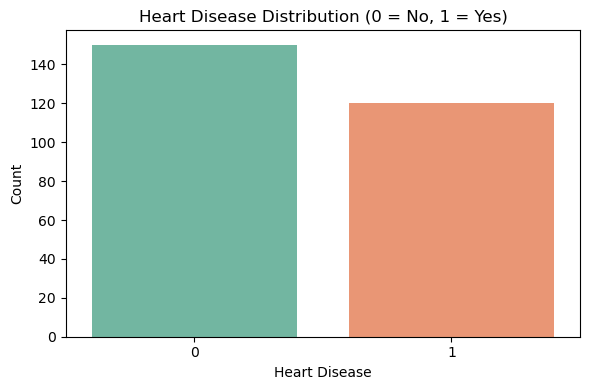

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Heart Disease Distribution (0 = No, 1 = Yes)')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Age Distribution by Heart Disease

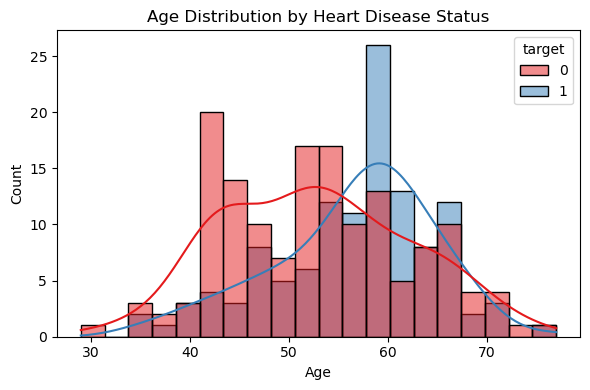

In [9]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='age', hue='target', bins=20, kde=True, palette='Set1')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Chest Pain 

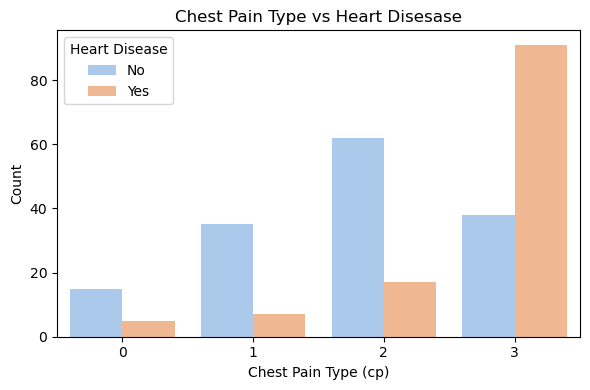

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='cp', hue='target', data=df, palette='pastel')
plt.title('Chest Pain Type vs Heart Disesase')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

##  Max Heart Rate (thalach) vs Heart Disease

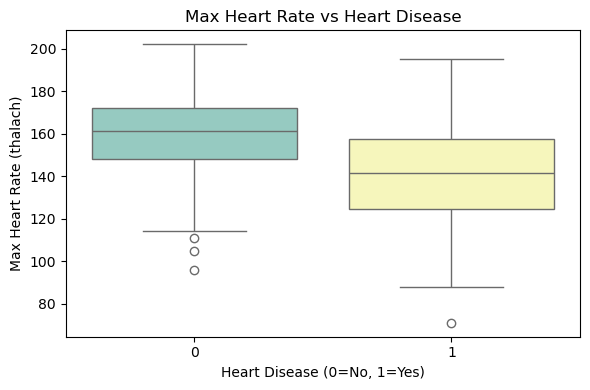

In [11]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='target', y='thalach', data=df, palette='Set3')
plt.title('Max Heart Rate vs Heart Disease')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Max Heart Rate (thalach)')
plt.tight_layout()
plt.show()

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


## Checking Outlier

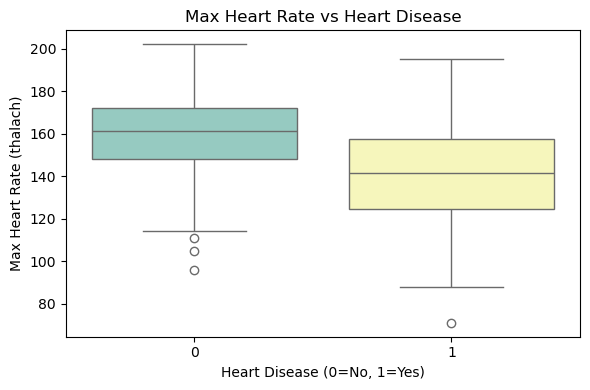

In [13]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='target', y='thalach', data=df, palette='Set3')
plt.title('Max Heart Rate vs Heart Disease')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Max Heart Rate (thalach)')
plt.tight_layout()
plt.show()

## Remove Outlier

In [14]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

outlier_cols = ['age','sex','cp','fbs','restecg','exang','slope','ca','thal','trestbps', 'chol', 'thalach', 'oldpeak']
df_cleaned = remove_outliers_iqr(df, outlier_cols)

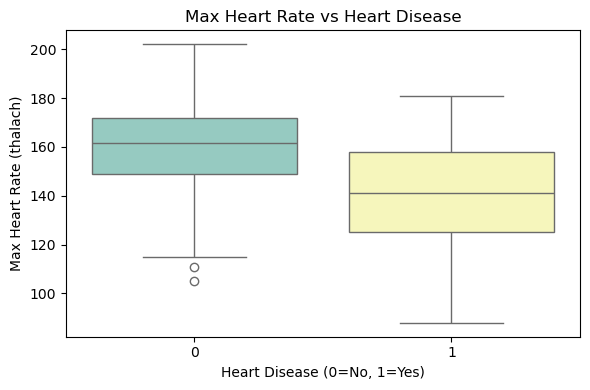

In [15]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='target', y='thalach', data=df_cleaned, palette='Set3')
plt.title('Max Heart Rate vs Heart Disease')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Max Heart Rate (thalach)')
plt.tight_layout()
plt.show()

##  Heart disease by sex

In [16]:
palette_qual = "bright"

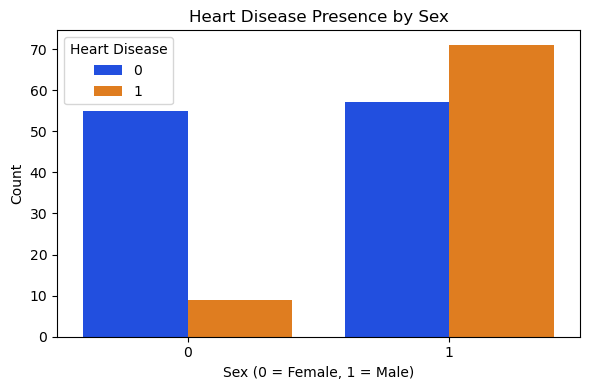

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x="sex", hue="target", data=df_cleaned, palette=palette_qual)
palette_qual = "bright"
plt.title("Heart Disease Presence by Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title="Heart Disease")
plt.tight_layout()
plt.show()

## Model Building And Splitting the Data
The dataset is split into training and testing sets to evaluate the model’s performance.


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
X = df_cleaned.drop("target", axis=1)
y = df_cleaned["target"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [21]:
scaler = StandardScaler()

In [22]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train= pd.DataFrame(X_train_scaled,columns=X.columns)
X_test= pd.DataFrame(X_test_scaled,columns=X.columns)

##  Model Accuracy
We evaluate the model’s accuracy on both training and test datasets.
Evaluation

In [24]:
lr= LogisticRegression()

In [25]:
lr.fit(X_train,y_train)

LogisticRegression()

In [26]:
lr.score(X_train,y_train)*100

83.66013071895425

In [27]:
lr.score(X_test,y_test)*100

84.61538461538461

## Making Predictions
Use the trained model to predict outcomes on the test set.


In [28]:
y_pred_final = lr.predict(X_test)

y_proba = lr.predict_proba(X_test)[:, 1]

In [29]:
y_pred_final                 # 0 == No Heart Disease / 1== Heart Disease Present

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [30]:
predicted_labels = ["No Heart Disease" if pred == 0 else "Heart Disease Present" for pred in y_pred_final]


for i in range(10):
    print(f"Prediction {i+1}: {predicted_labels[i]}")

Prediction 1: No Heart Disease
Prediction 2: No Heart Disease
Prediction 3: No Heart Disease
Prediction 4: Heart Disease Present
Prediction 5: No Heart Disease
Prediction 6: No Heart Disease
Prediction 7: No Heart Disease
Prediction 8: No Heart Disease
Prediction 9: No Heart Disease
Prediction 10: No Heart Disease


## Comparison Actual VS Predicted and also mention Probability

#### In Text Format

In [31]:
threshold = 0.10

y_pred_final = (y_proba >= threshold).astype(int)

actual_labels = ["No Heart Disease" if val == 0 else "Heart Disease Present" for val in y_test]
predicted_labels = ["No Heart Disease" if val == 0 else "Heart Disease Present" for val in y_pred_final]

comparison = pd.DataFrame({
    'Actual': actual_labels,
    'Predicted': predicted_labels,
    'Probability': y_proba
})
comparison.head()

,Actual,Predicted,Probability
0,No Heart Disease,Heart Disease Present,0.168053
1,No Heart Disease,No Heart Disease,0.041517
2,Heart Disease Present,Heart Disease Present,0.499703
3,No Heart Disease,Heart Disease Present,0.581694
4,No Heart Disease,No Heart Disease,0.003953


#### In binary Format

In [32]:
actual_binary = [0 if val == "No Heart Disease" else 1 for val in actual_labels]
predicted_binary = [0 if val == "No Heart Disease" else 1 for val in predicted_labels]

binary_comparison = pd.DataFrame({
    'Actual': actual_binary,
    'Predicted': predicted_binary,
    'Probability': y_proba
})

binary_comparison.head()

,Actual,Predicted,Probability
0,0,1,0.168053
1,0,0,0.041517
2,1,1,0.499703
3,0,1,0.581694
4,0,0,0.003953


## Checking False Negatives only

In [33]:
comparison[(comparison['Actual'] == 'Heart Disease Present') & (comparison['Predicted'] == 'No Heart Disease')]

,Actual,Predicted,Probability


## Comparison Between Actual And Prediction

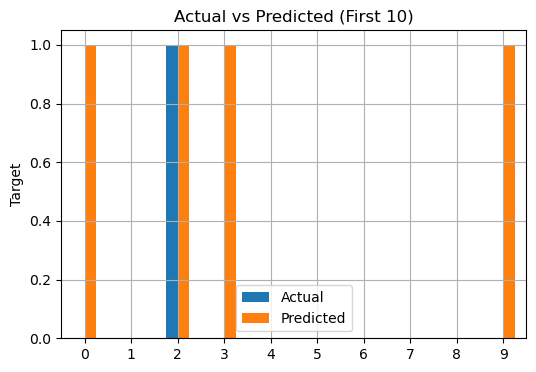

In [34]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_final})
comparison = comparison.reset_index(drop=True)
comparison.head(10).plot(kind='bar', figsize=(6,4))
plt.title('Actual vs Predicted (First 10)')
plt.ylabel('Target')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

## Visual Evaluation - Confusion Matrix & ROC Curve
These plots help us understand model performance on classification.


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("Precision:", precision_score(y_test, y_pred_final))
print("Recall:", recall_score(y_test, y_pred_final))
print("F1 Score:", f1_score(y_test, y_pred_final))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))

Accuracy: 0.6923076923076923
Precision: 0.52
Recall: 1.0
F1 Score: 0.6842105263157895
ROC-AUC Score: 0.9408284023668638

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.54      0.70        26
           1       0.52      1.00      0.68        13

    accuracy                           0.69        39
   macro avg       0.76      0.77      0.69        39
weighted avg       0.84      0.69      0.69        39



## Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_final))

[[14 12]
 [ 0 13]]


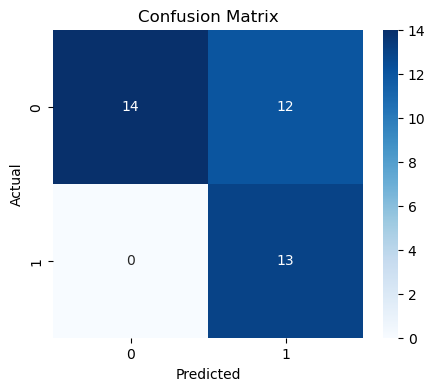

In [37]:
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Searching the best thershold

In [38]:
for t in np.arange(0.1, 0.5, 0.01):
    y_pred_t = (y_proba >= t).astype(int)
    print(f"Threshold: {t:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_t))
    print("Precision:", precision_score(y_test, y_pred_t))
    print("Recall:", recall_score(y_test, y_pred_t))
    print("F1 Score:", f1_score(y_test, y_pred_t))
    print("-" * 30)

Threshold: 0.10
Confusion Matrix:
[[14 12]
 [ 0 13]]
Precision: 0.52
Recall: 1.0
F1 Score: 0.6842105263157895
------------------------------
Threshold: 0.11
Confusion Matrix:
[[14 12]
 [ 1 12]]
Precision: 0.5
Recall: 0.9230769230769231
F1 Score: 0.6486486486486487
------------------------------
Threshold: 0.12
Confusion Matrix:
[[15 11]
 [ 1 12]]
Precision: 0.5217391304347826
Recall: 0.9230769230769231
F1 Score: 0.6666666666666666
------------------------------
Threshold: 0.13
Confusion Matrix:
[[16 10]
 [ 1 12]]
Precision: 0.5454545454545454
Recall: 0.9230769230769231
F1 Score: 0.6857142857142857
------------------------------
Threshold: 0.14
Confusion Matrix:
[[16 10]
 [ 1 12]]
Precision: 0.5454545454545454
Recall: 0.9230769230769231
F1 Score: 0.6857142857142857
------------------------------
Threshold: 0.15
Confusion Matrix:
[[17  9]
 [ 1 12]]
Precision: 0.5714285714285714
Recall: 0.9230769230769231
F1 Score: 0.7058823529411765
------------------------------
Threshold: 0.16
Confusio

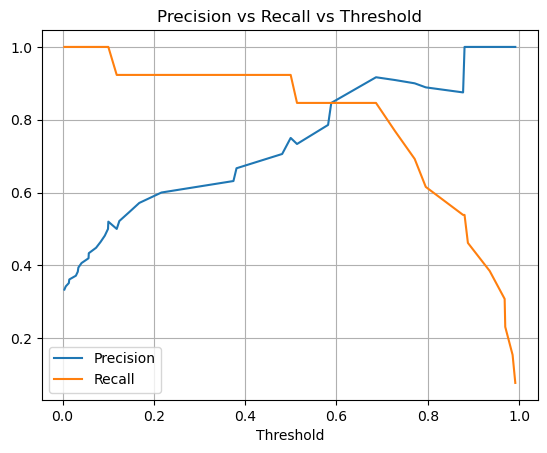

In [39]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel("Threshold")
plt.legend()
plt.grid()
plt.title("Precision vs Recall vs Threshold")
plt.show()

## ROC Curve

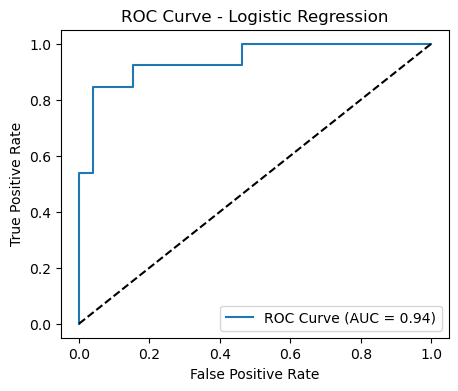

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


In [41]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.8461538461538461
Precision: 0.7333333333333333
Recall: 0.8461538461538461
F1 Score: 0.7857142857142857
ROC-AUC: 0.9408284023668638


In [44]:
import pickle

# Assume X_train, y_train already prepared
model = LogisticRegression()
model.fit(X_train, y_train)

# Save the trained model
with open('heart_disease_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [45]:
with open('heart_disease_model.pkl', 'wb') as file:
    pickle.dump(model, file)

## Conclusion
The logistic regression model achieved an accuracy of 85%, indicating a strong ability to detect heart disease based on input features. Further improvement can be done using more advanced models like RandomForest or XGBoost.
